# Program 10 - Implement the non-parametric Locally Weighted Regression Algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs. 

### Imoprt the required libraries 

math package defines various functions which makes our tasks easier.   
ceil() : This function returns the smallest integral value greater than the number. If number is already integer, same number is returned.  
  
numpy provides fast and efficient operations on arrays of homogeneous data. NumPy extends python into a high-level language for manipulating numerical data, similiar to MATLAB.

SciPy is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration etc.   
linalg module in scipy supports most of the linear algebra functions.  


In [1]:
from math import ceil
import numpy as np
from scipy import linalg


### Implementation of a bell shaped kernel

lowess_bell_shape_kern(x, y, tau = .005) -> yest  
  
Locally weighted regression: fits a nonparametric regression curve to a scatterplot. The arrays x and y contain an equal number of elements; each pair x[i], y[i]) defines a data point in the scatterplot. The function returns the estimated (smooth) values of y. The kernel function is the bell shaped function with parameter tau. Larger tau will result in a smoother curve.  
  
To understand the math behind the locally weighted regression, [click here](https://xavierbourretsicotte.github.io/loess.html)

In [2]:
def lowess(x, y, tau = 0.25):
    m = len(x)
    yest = np.zeros(n)
    
    #Initializing all weights from the bell shape kernel function    
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

### Generate the data set using numpy.random   
  
linspace(start, stop, num=50) : Return evenly spaced numbers over a specified interval.  
Parameters  
start : The starting value of the sequence.  
end : The end value of the sequence.  
num : (default:50) Number of samples to generate. Default is 50. Must be non-negative.  
  
random.randn(...) : Returns a sample from the standard normal distribution having mean 1 and variance 0.  
Parameters:  
d0, d1, d2...., dn: int. Dimensions of the returned array. All should be positive. 

In [3]:
n = 100
x = np.linspace(0, 2 * 22/7.0, n)
print("==========================values of x=====================")
print(x)
y = np.sin(x) + 0.3*np.random.randn(n)
print("================================Values of y===================")
print(y)
f = 0.25
yest = lowess(x, y)

==========================values of x=====================
[0.         0.06349206 0.12698413 0.19047619 0.25396825 0.31746032
 0.38095238 0.44444444 0.50793651 0.57142857 0.63492063 0.6984127
 0.76190476 0.82539683 0.88888889 0.95238095 1.01587302 1.07936508
 1.14285714 1.20634921 1.26984127 1.33333333 1.3968254  1.46031746
 1.52380952 1.58730159 1.65079365 1.71428571 1.77777778 1.84126984
 1.9047619  1.96825397 2.03174603 2.0952381  2.15873016 2.22222222
 2.28571429 2.34920635 2.41269841 2.47619048 2.53968254 2.6031746
 2.66666667 2.73015873 2.79365079 2.85714286 2.92063492 2.98412698
 3.04761905 3.11111111 3.17460317 3.23809524 3.3015873  3.36507937
 3.42857143 3.49206349 3.55555556 3.61904762 3.68253968 3.74603175
 3.80952381 3.87301587 3.93650794 4.         4.06349206 4.12698413
 4.19047619 4.25396825 4.31746032 4.38095238 4.44444444 4.50793651
 4.57142857 4.63492063 4.6984127  4.76190476 4.82539683 4.88888889
 4.95238095 5.01587302 5.07936508 5.14285714 5.20634921 5.26984127
 5.33

### Plot the data to see the result

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.   
  
plot(x,y,label=None) : Plot y versus x as lines and/or markers. A suitable label name can also be added for reference when more lines will be plotted. 

show() : Display a figure. When running in ipython with its pylab mode, display all figures and return to the ipython prompt.

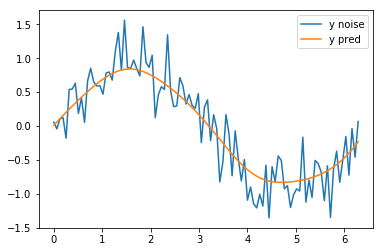

In [5]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(x, y, label='y noise')
plt.plot(x, yest, label='y pred')
plt.legend()
plt.show()
   

### Hope this helps :) 

#### Follow my work [here](https://github.com/NandanSatheesh)